#### Import of Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [3]:
df = pd.read_csv('datatraining.csv')
#df=df.head(5000)
df=df.drop(columns=["id","date"])

In [4]:
df.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1
1,23.15,27.2675,429.5,714.00,0.004783,1
2,23.15,27.2450,426.0,713.50,0.004779,1
3,23.15,27.2000,426.0,708.25,0.004772,1
4,23.10,27.2000,426.0,704.50,0.004757,1


In [5]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 381.8 KB
Number of duplicated rows is:  867
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

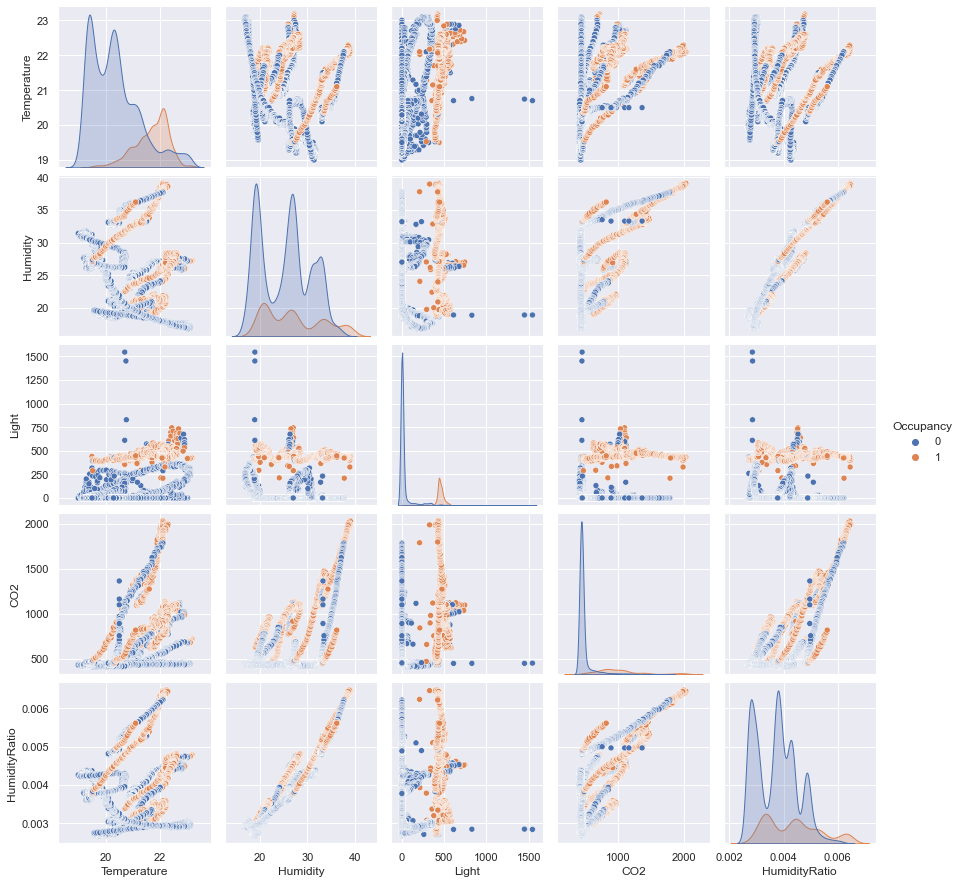

In [5]:
#sns.pairplot(df, hue='Occupancy')
#plt.show()

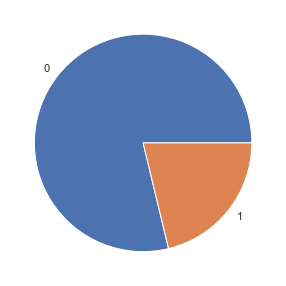

In [6]:
y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [8]:
X = df.drop(columns=['Occupancy'])
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,8143.0,20.619084,1.016916,19.000000,19.700000,20.390000,21.390000,23.180000
Humidity,8143.0,25.731507,5.531211,16.745000,20.200000,26.222500,30.533333,39.117500
Light,8143.0,119.519375,194.755805,0.000000,0.000000,0.000000,256.375000,1546.333333
CO2,8143.0,606.546243,314.320877,412.750000,439.000000,453.500000,638.833333,2028.500000
HumidityRatio,8143.0,0.003863,0.000852,0.002674,0.003078,0.003801,0.004352,0.006476


#### Standardize the Data

In [9]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,8143.0,7.818326e-16,1.000061,-1.592248,-0.903850,-0.225287,0.758139,2.518470
Humidity,8143.0,4.467615e-16,1.000061,-1.624791,-1.000115,0.088773,0.868186,2.420232
Light,8143.0,2.233807e-16,1.000061,-0.613726,-0.613726,-0.613726,0.702747,7.326619
CO2,8143.0,-1.884775e-16,1.000061,-0.616593,-0.533075,-0.486941,0.102726,4.524170
HumidityRatio,8143.0,1.116904e-16,1.000061,-1.394355,-0.920148,-0.072438,0.574253,3.066492


#### Observations and Variables

In [10]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

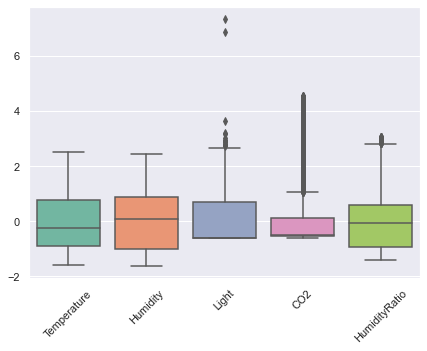

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

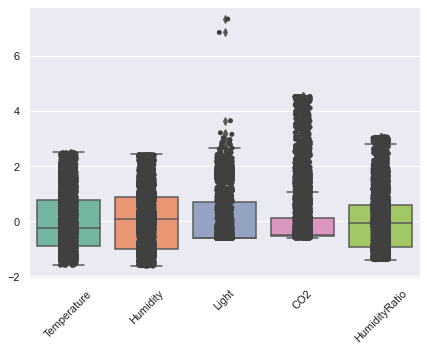

In [12]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

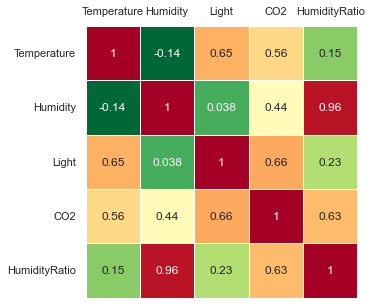

In [13]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [14]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [15]:
out['PC']

,PC1,PC2,PC3
0,2.375810,1.481548,-0.913234
1,2.354485,1.476060,-0.880672
2,2.342218,1.472145,-0.891961
3,2.325134,1.478671,-0.892121
4,2.293128,1.457935,-0.855139
...,...,...,...
8138,2.879268,-0.897206,0.468321
8139,2.866476,-0.877949,0.472498
8140,2.925637,-0.874514,0.433447
8141,2.990828,-0.895826,0.435690


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [99.98%] of the variance'}, xlabel='PC1 (54.7% expl.var)', ylabel='PC2 (33.9% expl.var)'>)

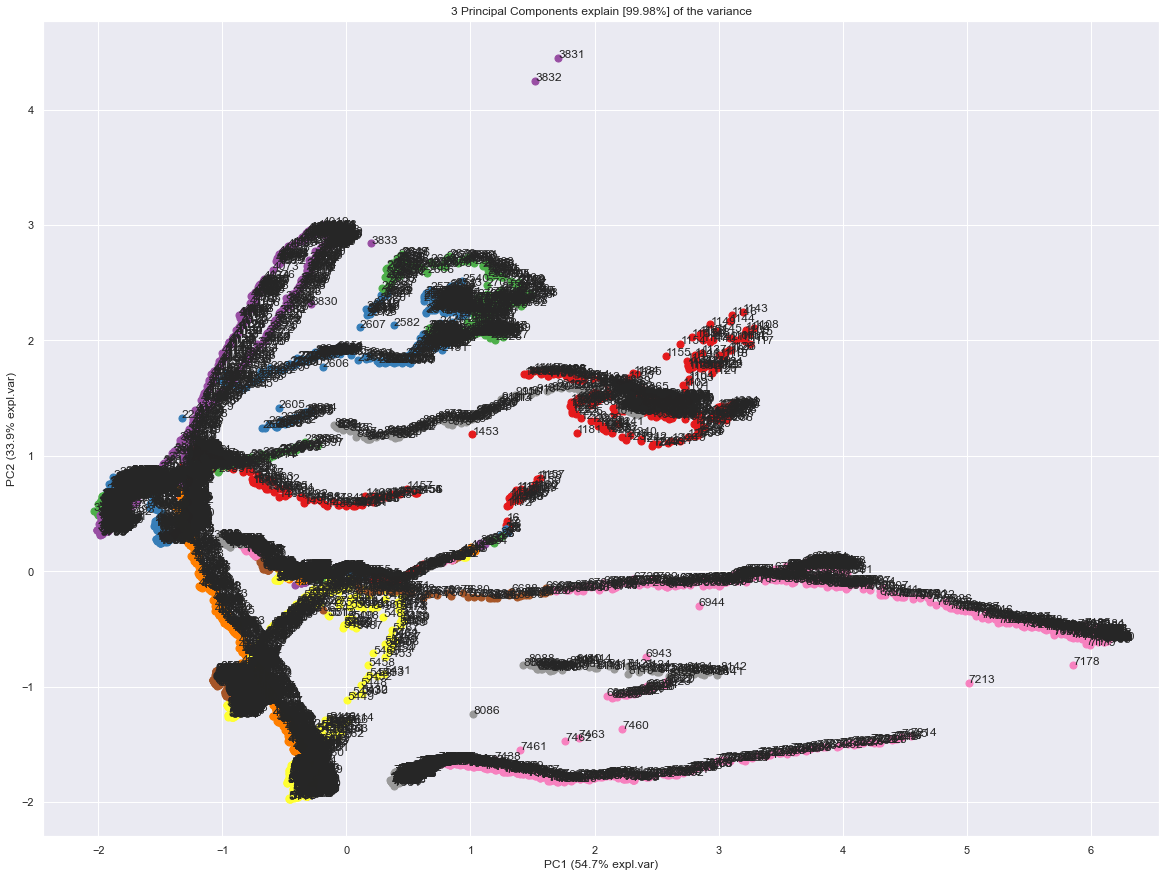

In [15]:
#model.scatter(label=True, legend=False)

Eigenvectors

In [16]:
A = out['loadings'].T

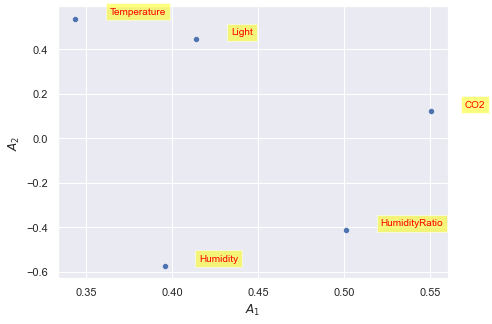

In [17]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

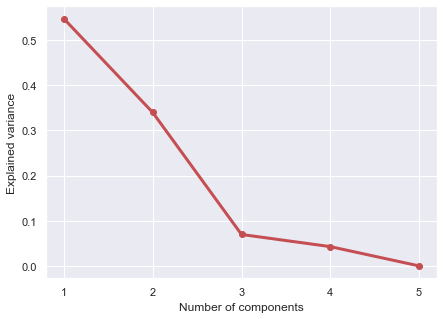

In [18]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

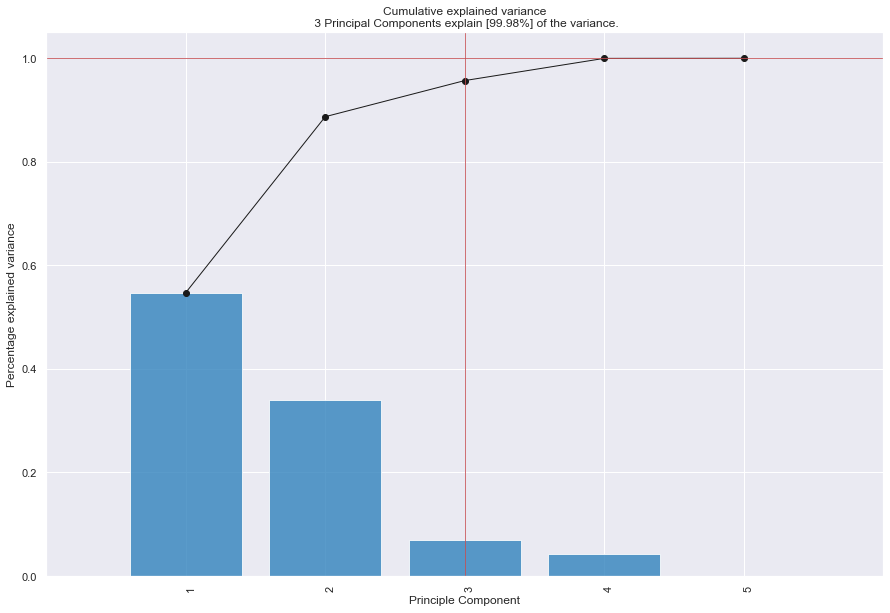

<Figure size 504x360 with 0 Axes>

In [19]:
model.plot();

BiPlot

In [20]:
#model.biplot(label=False, legend=False)

In [21]:
#model.biplot3d(legend=False)

Classification

In [26]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

data.head(5)
data_unseen.head(5)
print(data)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

      Temperature   Humidity   Light     CO2  HumidityRatio  Occupancy
0       20.840000  23.050000    0.00   455.0       0.003505          0
1       22.600000  17.125000  168.75   436.5       0.002897          0
2       19.200000  31.390000    0.00   429.0       0.004318          0
3       22.945000  27.290000    0.00   685.0       0.004728          0
4       21.700000  20.390000  494.00   791.0       0.003267          1
...           ...        ...     ...     ...            ...        ...
7324    20.290000  33.090000    0.00   454.0       0.004874          0
7325    19.050000  31.445000    0.00   436.0       0.004285          0
7326    21.390000  20.500000    0.00   724.0       0.003223          0
7327    22.500000  27.290000  469.00  1072.0       0.004601          1
7328    21.856667  18.166667   62.00   442.0       0.002937          0

[7329 rows x 6 columns]
Data for Modeling: (7329, 6)
Unseen Data For Predictions: (814, 6)


In [23]:
from pycaret.classification import *
clf = setup(data=data, target='Occupancy', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,Occupancy
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7329, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9953,0.9995,0.9869,0.9907,0.9888,0.9858,0.9858,0.2180
lightgbm,Light Gradient Boosting Machine,0.9940,0.9992,0.9860,0.9853,0.9856,0.9818,0.9818,0.0660
rf,Random Forest Classifier,0.9936,0.9994,0.9860,0.9835,0.9847,0.9806,0.9807,0.2730
ada,Ada Boost Classifier,0.9928,0.9988,0.9879,0.9781,0.9829,0.9783,0.9784,0.1070
dt,Decision Tree Classifier,0.9926,0.9888,0.9823,0.9825,0.9823,0.9776,0.9777,0.0160
gbc,Gradient Boosting Classifier,0.9926,0.9991,0.9823,0.9826,0.9823,0.9776,0.9777,0.2280
qda,Quadratic Discriminant Analysis,0.9891,0.9940,0.9935,0.9565,0.9745,0.9676,0.9680,0.0170
ridge,Ridge Classifier,0.9885,0.0000,0.9981,0.9499,0.9733,0.9660,0.9666,0.0140
knn,K Neighbors Classifier,0.9883,0.9966,0.9897,0.9565,0.9726,0.9652,0.9656,0.7910
lda,Linear Discriminant Analysis,0.9883,0.9929,0.9981,0.9491,0.9728,0.9654,0.9660,0.0150


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

Classifiers